In [1]:
import pandas as pd
import numpy as np

In [2]:
import math
from sklearn import linear_model

In [3]:
#You are at a Pokemon black market planning to buy a Pokemon for battle. 
#All Pokemon are sold at the same price and you can only afford to buy one. 
#You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either Type 1 or Type 2. 
#Which type should you choose in order to maximize your chance of receiving a good Pokemon

In [4]:
#HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed.

In [5]:
Pokemon = pd.read_csv('Pokemon.csv') 

In [6]:
Pokemon.head(60)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [7]:
#Problem Solving Iteration 1

In [8]:
#HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed
#What is the formula to compute Total?
#Does the formula work for all pokemon?

In [9]:
def hypothesis_total (xtotal):
    if xtotal['Total']==xtotal['HP']+xtotal['Attack']+xtotal['Defense']+xtotal['Sp. Atk']+xtotal['Sp. Def']+xtotal['Speed']:
         return 'TRUE'
    else:
        return 'FALSE'
    
Pokemon['hypothesis_total']=Pokemon.apply(hypothesis_total,axis=1)



In [10]:
Pokemon['hypothesis_total'].value_counts()
#800 rows (see also Pokemon.head)
#Check column hypothesis_total --> TRUE (for every Pokemon)

TRUE    800
Name: hypothesis_total, dtype: int64

In [11]:
#Problem Solving Iteration 2

In [12]:
Pokemon_type1=Pokemon[['Type 1']]

In [13]:
Pokemon_type2=Pokemon[['Type 2']]

In [14]:
#In addition, keep in mind that Type 1 always has a value but Type 2 is sometimes empty (having the NaN value).

In [15]:
Pokemon_type2.isna().sum()

Type 2    386
dtype: int64

In [16]:
round(Pokemon_type2.isna().sum()/len(Pokemon_type2),4)*100
# 0 values 

Type 2    48.25
dtype: float64

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder_type1 = OneHotEncoder().fit(Pokemon_type1)
print(encoder_type1.categories_)
encoded = encoder_type1.transform(Pokemon_type1).toarray()
print(encoded)
onehot_encoded_type1 = pd.DataFrame(encoded,columns=encoder_type1.categories_)
onehot_encoded_type1.head()

[array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder_type2 = OneHotEncoder().fit(Pokemon_type2)
print(encoder_type2.categories_)
encoded = encoder_type2.transform(Pokemon_type2).toarray()
print(encoded)
onehot_encoded_type2 = pd.DataFrame(encoded,columns=encoder_type2.categories_)
onehot_encoded_type2.head()

[array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water', nan], dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,NaN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
mean_median_home_value = onehot_encoded_type2.mean()

In [21]:
onehot_encoded_type2.head(60)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,NaN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
onehot_encoded_type2.isna().sum()

Bug         0
Dark        0
Dragon      0
Electric    0
Fairy       0
Fighting    0
Fire        0
Flying      0
Ghost       0
Grass       0
Ground      0
Ice         0
Normal      0
Poison      0
Psychic     0
Rock        0
Steel       0
Water       0
NaN         0
dtype: int64

In [23]:
Overview_type1_type2 = pd.concat([onehot_encoded_type1, onehot_encoded_type2], axis=1)

In [24]:
Overview_type1_type2

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,...,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,NaN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Problem Solving Iteration 3
# calculate the correlation of Total to each of the encoded fields. 
# Rank the correlations and identify the #1 pokemon type that is most likely to have the highest Total.

In [26]:
Total=Pokemon['Total']


In [27]:
Total.head(5)

0    318
1    405
2    525
3    625
4    309
Name: Total, dtype: int64

In [28]:
check_correlations=pd.concat([Overview_type1_type2,Total],axis=1)


In [29]:
check_correlations.head(10)

,"(Bug,)","(Dark,)","(Dragon,)","(Electric,)","(Fairy,)","(Fighting,)","(Fire,)","(Flying,)","(Ghost,)","(Grass,)",...,"(Ground,)","(Ice,)","(Normal,)","(Poison,)","(Psychic,)","(Rock,)","(Steel,)","(Water,)","(nan,)",Total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,318
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,405
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,525
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,625
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,309
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,405
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,634
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,634
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,314


In [30]:
#problem solving 3 not finished yet

In [31]:
# How to identify the relationship between Total and the encoded pokemon type fields?

In [32]:
Pokemon_total = Pokemon['Total']

In [33]:
Pokemon_total.head(5)

0    318
1    405
2    525
3    625
4    309
Name: Total, dtype: int64

In [34]:
overview_relations=pd.concat([Overview_type1_type2,Pokemon_total],axis=1)
overview_relations.head()


,"(Bug,)","(Dark,)","(Dragon,)","(Electric,)","(Fairy,)","(Fighting,)","(Fire,)","(Flying,)","(Ghost,)","(Grass,)",...,"(Ground,)","(Ice,)","(Normal,)","(Poison,)","(Psychic,)","(Rock,)","(Steel,)","(Water,)","(nan,)",Total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,318
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,405
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,525
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,625
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,309


In [35]:
#Rank the correlations and identify the #1 pokemon type that is most likely to have the highest Total.

In [36]:
overview_relations.corr()

,"(Bug,)","(Dark,)","(Dragon,)","(Electric,)","(Fairy,)","(Fighting,)","(Fire,)","(Flying,)","(Ghost,)","(Grass,)",...,"(Ground,)","(Ice,)","(Normal,)","(Poison,)","(Psychic,)","(Rock,)","(Steel,)","(Water,)","(nan,)",Total
"(Bug,)",1.000000,-0.061686,-0.062713,-0.074119,-0.045270,-0.057419,-0.081006,-0.021779,-0.062713,-0.095138,...,-0.022177,-0.041003,-0.021779,0.200143,-0.063727,0.060868,0.138928,-0.007046,-0.145178,-0.143957
"(Dark,)",-0.061686,1.000000,-0.040984,-0.048438,-0.029584,-0.037524,-0.052938,-0.014233,-0.040984,-0.062173,...,-0.042946,0.071991,-0.014233,-0.042300,0.023490,-0.026796,0.045446,-0.026796,-0.064256,0.017818
"(Dragon,)",-0.062713,-0.040984,1.000000,-0.049245,-0.030077,-0.038149,-0.053820,-0.014470,-0.041667,-0.063209,...,0.112272,0.118700,-0.014470,-0.043005,0.085964,-0.027243,-0.034325,-0.027243,-0.056679,0.196532
"(Electric,)",-0.074119,-0.048438,-0.049245,1.000000,-0.035547,-0.045088,-0.063609,-0.017102,-0.049245,-0.074706,...,-0.051602,0.009617,0.138368,-0.050827,-0.050041,-0.032197,0.060014,0.009617,0.063312,0.016715
"(Fairy,)",-0.045270,-0.029584,-0.030077,-0.035547,1.000000,-0.027538,-0.038850,-0.010445,-0.030077,-0.045628,...,-0.031517,-0.019665,-0.010445,-0.031043,-0.030563,-0.019665,-0.024778,-0.019665,0.117907,-0.026948
"(Fighting,)",-0.057419,-0.037524,-0.038149,-0.045088,-0.027538,1.000000,-0.049277,-0.013248,-0.038149,-0.057873,...,-0.039976,-0.024943,-0.013248,-0.039375,0.065654,-0.024943,0.053226,-0.024943,0.096586,-0.029086
"(Fire,)",-0.081006,-0.052938,-0.053820,-0.063609,-0.038850,-0.049277,1.000000,-0.018691,-0.053820,-0.081647,...,0.017973,-0.035189,0.125084,-0.055549,-0.003697,0.003480,-0.013332,0.003480,0.029528,0.050527
"(Flying,)",-0.021779,-0.014233,-0.014470,-0.017102,-0.010445,-0.013248,-0.018691,1.000000,-0.014470,-0.021951,...,-0.015163,-0.009461,-0.005025,-0.014935,-0.014704,-0.009461,-0.011921,-0.009461,0.002483,0.029504
"(Ghost,)",-0.062713,-0.040984,-0.041667,-0.049245,-0.030077,-0.038149,-0.053820,-0.014470,1.000000,-0.063209,...,-0.043661,-0.027243,-0.014470,0.083480,-0.042340,-0.027243,-0.034325,-0.027243,-0.069445,0.007594
"(Grass,)",-0.095138,-0.062173,-0.063209,-0.074706,-0.045628,-0.057873,-0.081647,-0.021951,-0.063209,1.000000,...,-0.044608,0.059883,-0.021951,0.263700,-0.019742,-0.041328,0.002029,-0.041328,-0.006861,-0.036057


In [37]:
import seaborn as sns

In [44]:
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

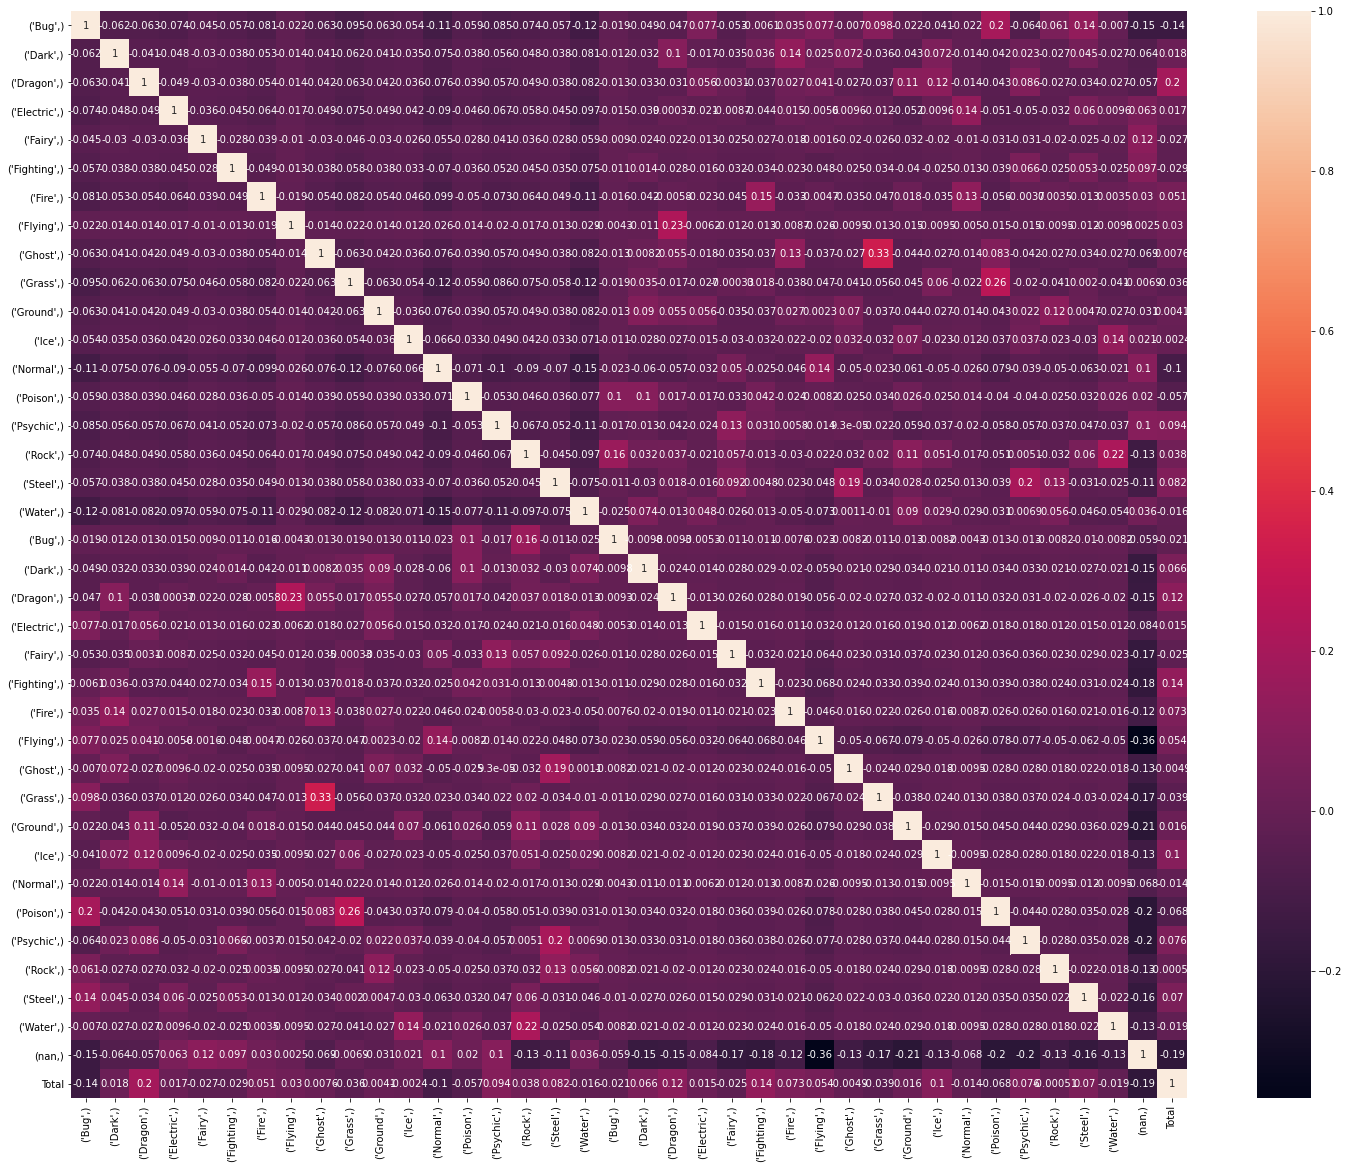

In [45]:
figsize = plt.figure(figsize=(25,20))
sns.heatmap(overview_relations.corr(), annot=True)
plt.show

In [ ]:
# We can see that there is a very strong positive correlation between dragon and total